
                
## Bitcoin Price Predictor  
                
###  Importing necessary libraries

Since we're performing a data science on bitcoin prices dataset, we first need to make sure we import the necessary libraries like SciKit Learn, Statsmodels, pandas and so on.

Import all necessary libraries below.

In [12]:
#initial_code, the code written here will be shown to user, write here initial setup to help user get started.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

import scikit learn, statsmodels, pandas, seaborn and matplotlib.pylot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

In [ ]:
#this is assertion block which verifies the solution.

print('continue')

### Reading file using Pandas

We now have to read our dataset. This can be done using Pandas Function, read_csv()



In [21]:
#write code here
data = pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv")

The name of the dataset is to be passed as an arg to the function.
Here we'll pass the link of the csv file.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/bitcoin_dataset.csv")

In [ ]:
#this is assertion block which verifies the solution.

print('continue')

### Performing EDA for the given dataset

We will now perform an exploratory data analysis to decide which features we'll have to take in and not. We will be using jointplots and stripplots to analyse the data that's given to us.
These functions are basically a part of the Seaborn library. We'll plot scatterplots for difficulty, market cap and trade volume and hash rate wrt to market price.
Scatterplots will be drawn for n orphaned blocks.
This particular way of performing EDA will help us figure out which features we'll have to take and which we can discard.

On comparing market price with market cap, you'll notice that as and when the market cap decreases, the price of bitcoin also decreases. This is in sync with the demand and supply rule. As more people have it, the price will be more. Once people start selling it the price goes down.

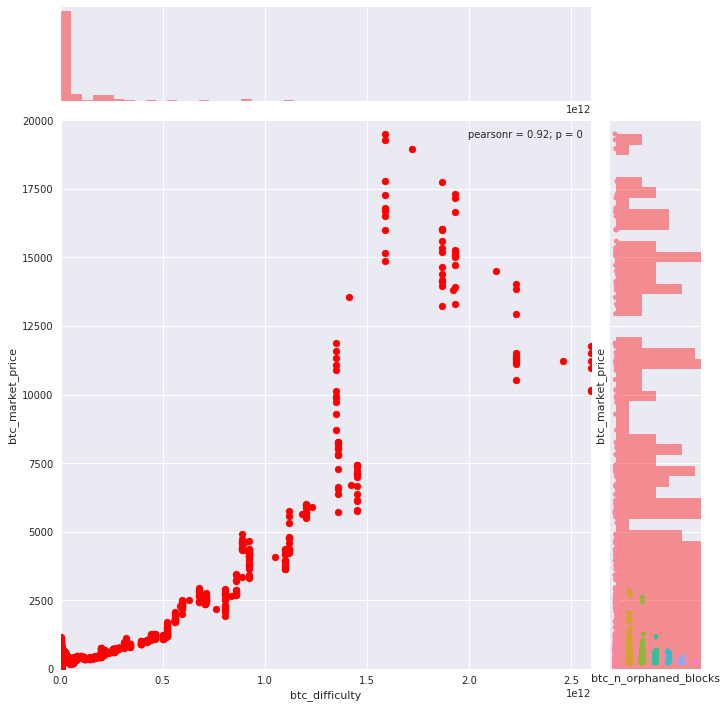

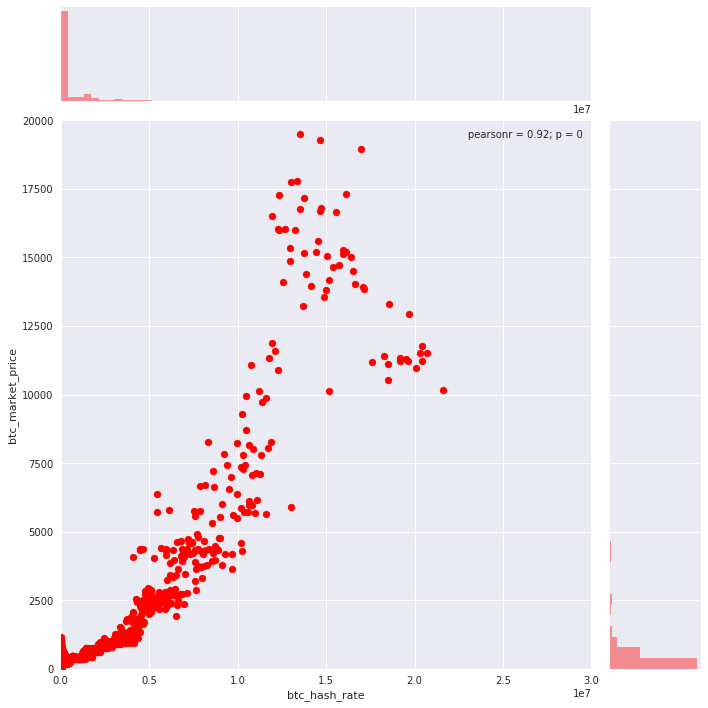

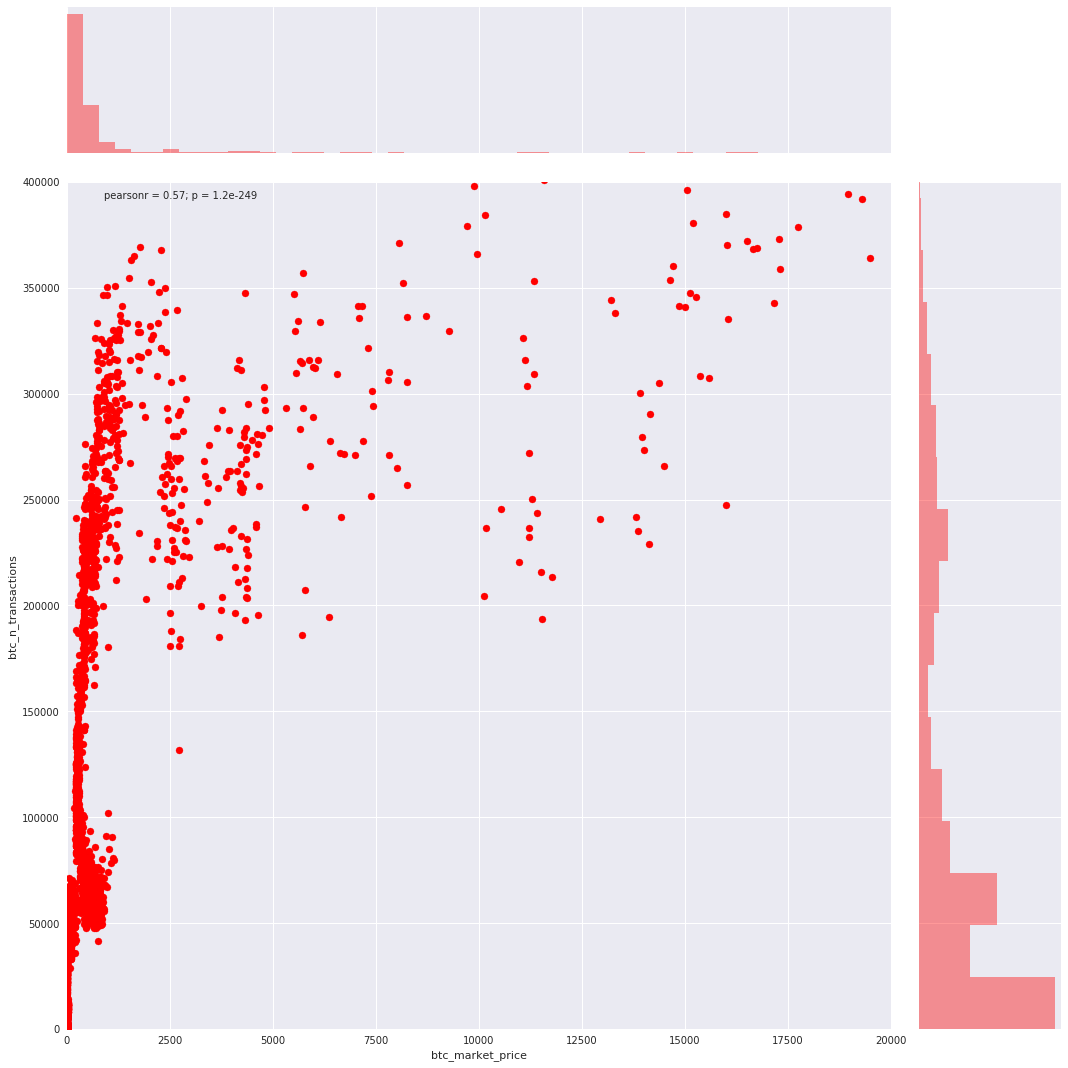

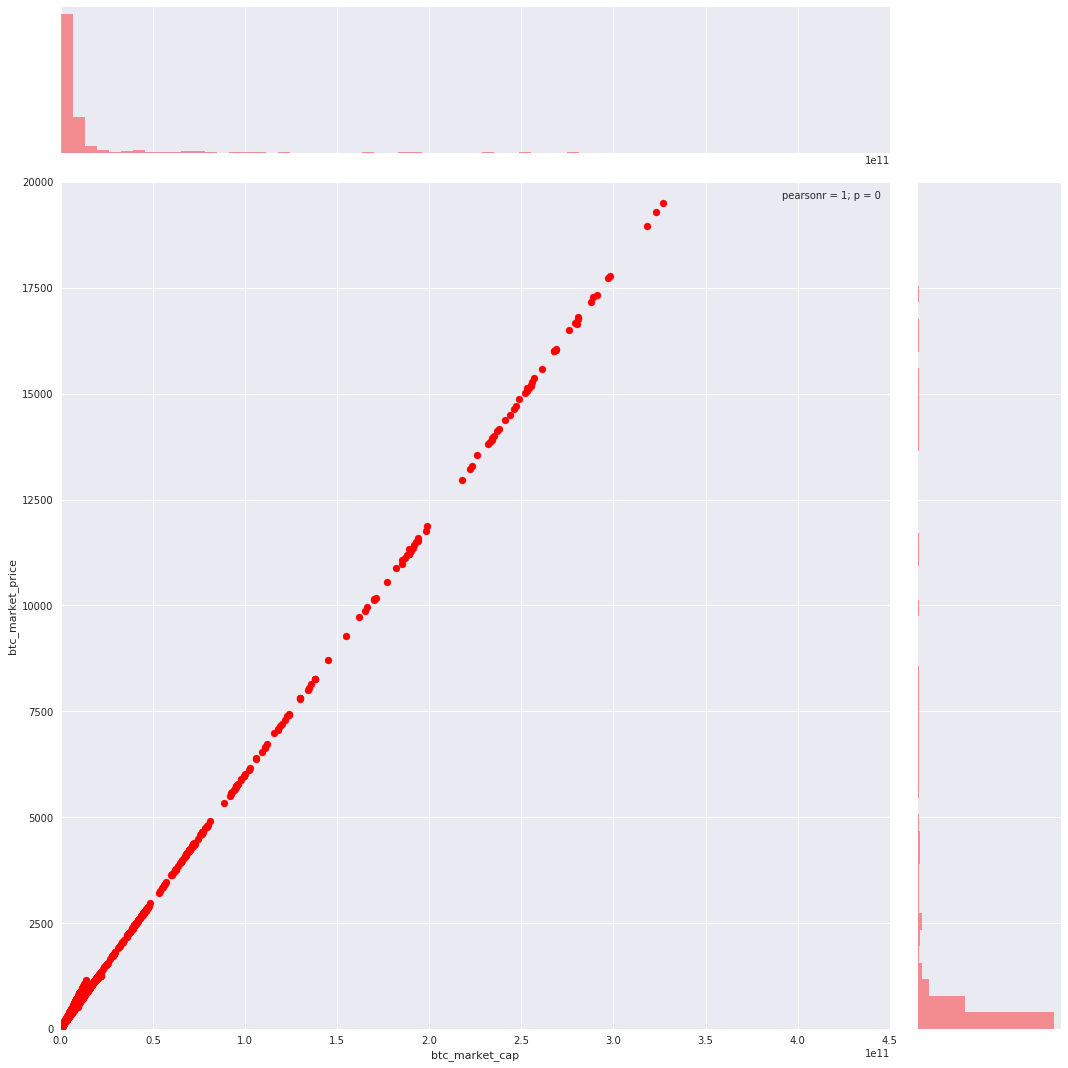

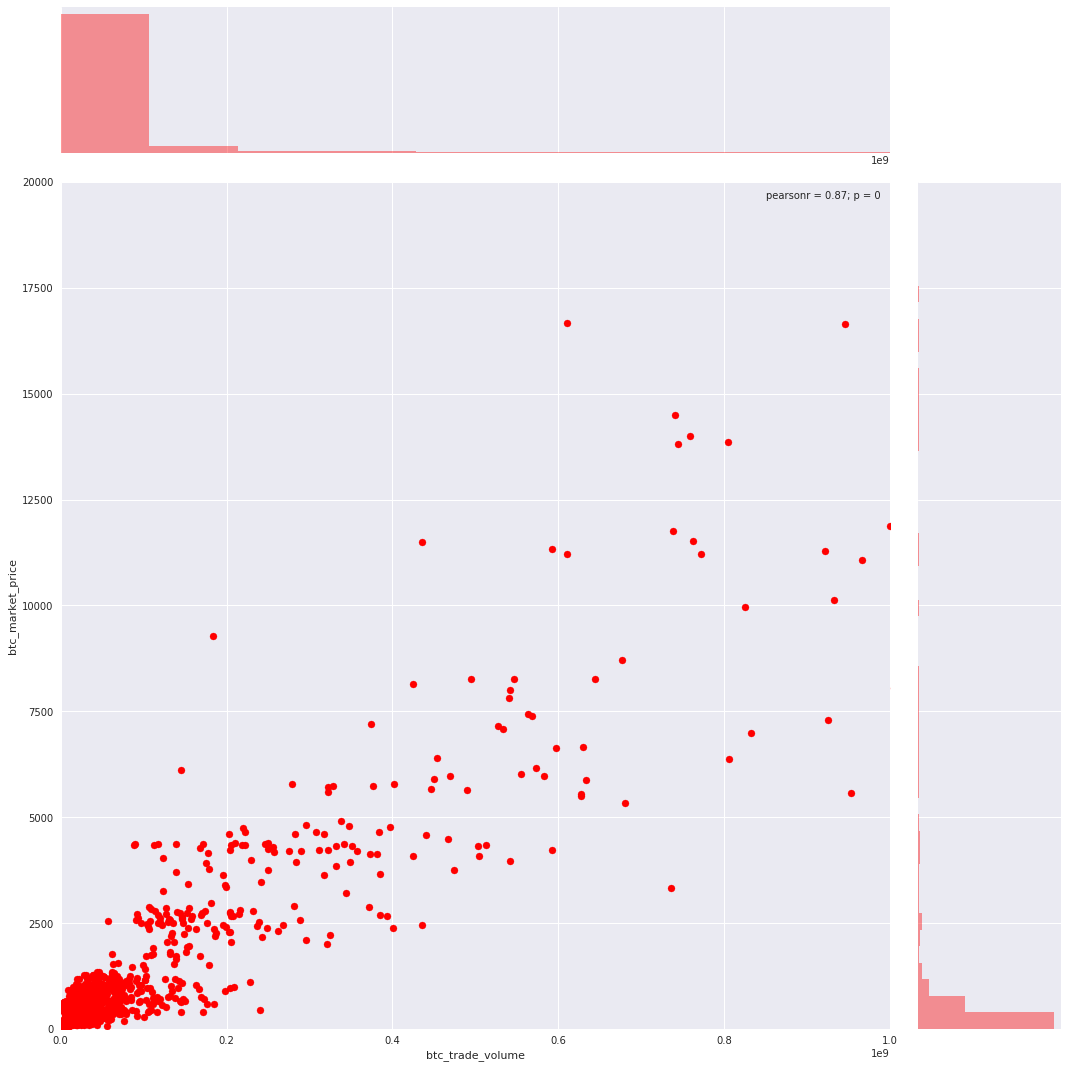

In [22]:
#write the code here
g = sns.jointplot( "btc_difficulty", "btc_market_price", data=data, xlim=(0, 2.6E+12), ylim=(0, 20000), color="r", size=10)
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)
a = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)
b = sns.jointplot("btc_market_price","btc_n_transactions", data=data, ylim=(0, 400000), xlim=(0, 20000), color="r", size=15)
c = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)
d = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

Just use jointplot function for the remaining fields and replace the btc_difficulty with the necessary fields.
Also change limits as required.

In [ ]:
g = sns.jointplot( "btc_difficulty", "btc_market_price", data=data, xlim=(0, 2.6E+12), ylim=(0, 20000), color="r", size=10)
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)
a = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)
b = sns.jointplot("btc_market_price","btc_n_transactions", data=data, ylim=(0, 400000), xlim=(0, 20000), color="r", size=15)
c = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)
d = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

In [ ]:
print('continue')

### Cleaning of data.
The data fields we'll be choosing for our prediction would be btc_market_price, btc_market_cap, btc_n_transactions, btc_miners_revenue, btc_cost_per_transaction, btc_difficulty, btc_hash_rate, btc_cost_per_transaction_percent.
Now since many fields are filled with NaN values, you're supposed to fill it with some value.
All ML algorithms work on numbers mostly, and as a result, we need to have some value there in place for NaN and for this, we'll use the fillna function from pandas.
you can fill is with mean, mode or median.

In [23]:
#write code here
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

In [ ]:
data['field_name'].fillna(data['fieldname'].median(), inplace = True)

In [ ]:
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

In [ ]:
print('continue')

### Now let's perform Regressions on this dataset
Regression is a Machine Learning algorithm, that helps us predict certain numbers. In this case, it'll help us predict the value of bitcoin. We'll be using the linear regression algorithm present in Statsmodels. The ordinary least square function will help us with this(ols).
Since we've already imported statsmodels.forumula.api as smf, we'll go with it.
the ols function is present here.

In [24]:
#write code here
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

just say smf.ols(formula="",data=data).fit()

In [ ]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [ ]:
print('continue')

### Now let's check our predicted values basically and check how much is the mean squared error.

The mean squared error is a number that tells you how good a fit your model is. The lesser the value of the MSE, the better the model is.
The MSE can be reduced in various manners, such as including all necessary features or using optimizers present in SciKit Learn library(like gradient descent).
Here, we'll find the y values and we'll also check the MSE in order to find how good our model is.

In [25]:
#write your code here
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.614329178


use mse function from scikit learn but before that, get y values to compute the mse.

In [ ]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

In [ ]:
print('continue')

### Now let's compare it with the test data set that we have.

For this we'll again use the pandas function to read a csv file. We'll again read the dataset which is there online. SO pass the url as an arg to read_csv function. After that we'll have to predict the values.

For this we'll use the predict function on the ML model that we've created which is variable "model".

This is the actual BITCOIN price data between 1st-14th of february (2018). Our test set contains this data only.

If you notice closely after writing your code:

### THE PREDICTED VALUES ARE VERY NEAR TO THE CLOSE PRICE ON A GIVEN DAY.

Date 	           Open 	High 	    Low 	    Close 	    Volume 	         Market Cap

Feb 14, 2018 	8,599.92 	9,518.54 	8,599.92 	9,494.63 	7,909,820,000 	145,023,000,000
Feb 13, 2018 	8,926.72 	8,958.47 	8,455.41 	8,598.31 	5,696,720,000 	150,516,000,000
Feb 12, 2018 	8,141.43 	8,985.92 	8,141.43 	8,926.57 	6,256,440,000 	137,258,000,000
Feb 11, 2018 	8,616.13 	8,616.13 	7,931.10 	8,129.97 	6,122,190,000 	145,245,000,000
Feb 10, 2018 	8,720.08 	9,122.55 	8,295.47 	8,621.90 	7,780,960,000 	146,981,000,000
Feb 09, 2018 	8,271.84 	8,736.98 	7,884.71 	8,736.98 	6,784,820,000 	139,412,000,000
Feb 08, 2018 	7,637.86 	8,558.77 	7,637.86 	8,265.59 	9,346,750,000 	128,714,000,000
Feb 07, 2018 	7,755.49 	8,509.11 	7,236.79 	7,621.30 	9,169,280,000 	130,683,000,000
Feb 06, 2018 	7,051.75 	7,850.70 	6,048.26 	7,754.00 	13,999,800,000 	118,810,000,000
Feb 05, 2018 	8,270.54 	8,364.84 	6,756.68 	6,955.27 	9,285,290,000 	139,325,000,000
Feb 04, 2018 	9,175.70 	9,334.87 	8,031.22 	8,277.01 	7,073,550,000 	154,553,000,000
Feb 03, 2018 	8,852.12 	9,430.75 	8,251.63 	9,174.91 	7,263,790,000 	149,085,000,000
Feb 02, 2018 	9,142.28 	9,142.28 	7,796.49 	8,830.75 	12,726,900,000 	153,953,000,000
Feb 01, 2018 	10,237.30 	10,288.80 	8,812.28 	9,170.54 	9,959,400,000 	172,372,000,000

In [26]:
#write code here


0     9058.088237
1     8899.085658
2     9119.843048
3     8466.687256
4     6800.753793
5     7625.499114
6     8072.405388
7     8259.810369
8     8557.971720
9     8334.015254
10    8425.712247
11    8836.588496
12    8623.849963
13    9363.419949
dtype: float64


pd.read_csv('url')

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = x.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))